In [6]:
import pandas as pd

data = {
    'Student ID': ['A123', 'B456', 'C789', 'D101', 'E202'],
    'Risk Signals': ['Aggressive behavior', 'None', 'Skipping classes', 'None', 'Disruptive in class'],
    'Attendance %': [60, 95, 45, 85, 50],
    'Grades': [2.0, 3.6, 1.5, 2.8, 1.9],
    'Discipline Incidents': [3, 0, 2, 1, 4],
    'Counselor Visits': [1, 0, 0, 2, 0],
    'Previous Alerts': [2, 0, 1, 0, 3],
    'Social Post': [
        "I feel like giving up",
        "Excited for break!",
        "Nobody understands me",
        "Had a good day today",
        "I hate everything right now"
    ]
}

df = pd.DataFrame(data)
df


,Student ID,Risk Signals,Attendance %,Grades,Discipline Incidents,Counselor Visits,Previous Alerts,Social Post
0,A123,Aggressive behavior,60,2.0,3,1,2,I feel like giving up
1,B456,None,95,3.6,0,0,0,Excited for break!
2,C789,Skipping classes,45,1.5,2,0,1,Nobody understands me
3,D101,None,85,2.8,1,2,0,Had a good day today
4,E202,Disruptive in class,50,1.9,4,0,3,I hate everything right now


In [7]:
def calculate_risk(row):
    score = 0
    if row['Risk Signals'] != "None":
        score += 4
    if row['Attendance %'] < 70:
        score += 3
    if row['Grades'] < 2.5:
        score += 2
    if row['Discipline Incidents'] > 1:
        score += 2
    if row['Previous Alerts'] > 0:
        score += 2
    return score

df['Risk Score'] = df.apply(calculate_risk, axis=1)


In [8]:
def sentiment_score(text):
    negative_keywords = ['giving up', 'alone', 'hate', 'nobody understands', 'fail']
    return sum(1 for word in negative_keywords if word in text.lower())

df['NLP Score'] = df['Social Post'].apply(sentiment_score)
df['Risk Score'] += df['NLP Score']


In [9]:
def decide_action(score):
    if score >= 10:
        return "🚨 Escalate to Counselor"
    elif score >= 6:
        return "👀 Add to Watchlist"
    else:
        return "✅ No Action Needed"

df['Action'] = df['Risk Score'].apply(decide_action)
df



,Student ID,Risk Signals,Attendance %,Grades,Discipline Incidents,Counselor Visits,Previous Alerts,Social Post,Risk Score,NLP Score,Action
0,A123,Aggressive behavior,60,2.0,3,1,2,I feel like giving up,14,1,🚨 Escalate to Counselor
1,B456,None,95,3.6,0,0,0,Excited for break!,0,0,✅ No Action Needed
2,C789,Skipping classes,45,1.5,2,0,1,Nobody understands me,14,1,🚨 Escalate to Counselor
3,D101,None,85,2.8,1,2,0,Had a good day today,0,0,✅ No Action Needed
4,E202,Disruptive in class,50,1.9,4,0,3,I hate everything right now,14,1,🚨 Escalate to Counselor


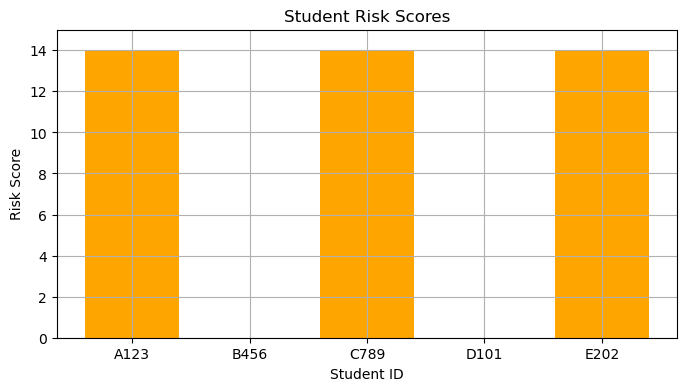

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.bar(df['Student ID'], df['Risk Score'], color='orange')
plt.title('Student Risk Scores')
plt.xlabel('Student ID')
plt.ylabel('Risk Score')
plt.ylim(0, 15)
plt.grid(True)
plt.show()


C:\Users\Vishan Lingam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Vishan Lingam\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


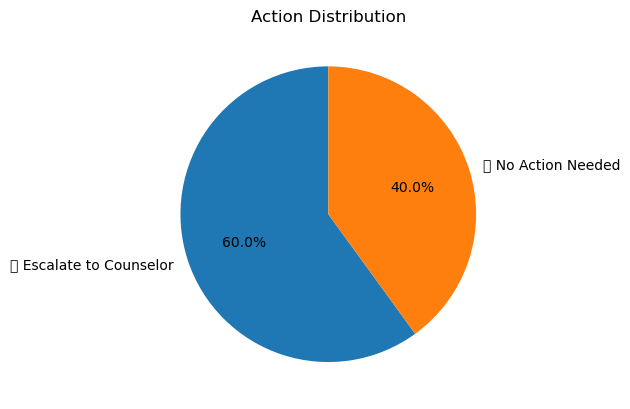

In [11]:
df['Action'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Action Distribution')
plt.ylabel('')
plt.show()


In [12]:
for _, row in df[df['Action'] == '🚨 Escalate to Counselor'].iterrows():
    print(f"ALERT: Student {row['Student ID']} flagged with Risk Score {row['Risk Score']} – Immediate action required!")


ALERT: Student A123 flagged with Risk Score 14 – Immediate action required!
ALERT: Student C789 flagged with Risk Score 14 – Immediate action required!
ALERT: Student E202 flagged with Risk Score 14 – Immediate action required!


In [13]:
df[df['Action'] == '🚨 Escalate to Counselor'].to_csv('student_alerts.csv', index=False)
